# pandas: paquete para análisis y manipulación de datos

## Descripción general

[pandas](https://pandas.pydata.org/) es una biblioteca de Python para análisis y manipulación de datos. Proporciona estructuras de datos y operaciones para manejar tablas numéricas y series temporales. Fue creada por Wes McKinney in 2008. El nombre "pandas" hace referencia tanto a "*Panel Data*" como a "*Python Data Analysis*".

Como su estructura principal, pandas implementa el `DataFrame`, el cual es un arreglo rectangular de datos, organizado en filas y columnas.

## Carga

In [1]:
# Se acostumbra cargar pandas con el alias pd

import pandas as pd

## Estructuras de datos
Las dos principales estructuras de datos de pandas son `Series` y `DataFrames`.

### Series
Las [Series](https://pandas.pydata.org/docs/reference/api/pandas.Series.html?highlight=series#pandas.Series) son arreglos unidimensionales que contienen datos de cualquier tipo. Se asemejan a una columna de una tabla.

In [2]:
# Definición de una serie

primos = [2, 3, 5, 7, 11]
serie_primos = pd.Series(primos)

serie_primos

0     2
1     3
2     5
3     7
4    11
dtype: int64

Cada elemento de una serie tiene un índice (i.e. posición), comenzando con 0.

In [3]:
# Primer elemento
print("Primer elemento:", serie_primos[0])

# Segundo elemento
print("Segundo elemento:", serie_primos[1])

Primer elemento: 2
Segundo elemento: 3


Los índices también pueden tener etiquetas personalizadas.

In [4]:
# Índice de una serie con etiquetas personalizadas

serie_primos = pd.Series(primos, index = ["A", "B", "C", "D", "E"])

serie_primos

A     2
B     3
C     5
D     7
E    11
dtype: int64

In [5]:
# Elemento en el índice "D"
print(serie_primos["D"])

7


### DataFrames
Los [DataFrames](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) son estructuras multidimensionales. Una serie puede verse como una columna de una tabla y un dataframe como una tabla completa. Un dataframe puede construirse a partir de varias series.

In [6]:
# Dataframe construído a partir de dos series

datos = {
  "pais": ["PA", "CR", "NI"],
  "poblacion": [4.1, 5.0, 6.6]
}

paises = pd.DataFrame(datos)

paises

,pais,poblacion
0,PA,4.1
1,CR,5.0
2,NI,6.6


El operador **loc** permite retornar una o más filas de un dataframe, de acuerdo con un índice o con un vector de índices.

In [7]:
# Segundo elemento
paises.loc[1]

pais          CR
poblacion    5.0
Name: 1, dtype: object

In [8]:
# Segundo y tercer elemento
paises.loc[[1, 2]]

,pais,poblacion
1,CR,5.0
2,NI,6.6


Los índices de los dataframes también pueden etiquetarse:

In [9]:
paises = pd.DataFrame(datos, index=["pais0", "pais1", "pais2"])
paises

,pais,poblacion
pais0,PA,4.1
pais1,CR,5.0
pais2,NI,6.6


In [10]:
# Elemento en "pais0"
paises.loc["pais0"]

pais          PA
poblacion    4.1
Name: pais0, dtype: object

## Operaciones básicas

Seguidamente, se describen y ejemplifican algunas de las funciones básicas de pandas.

En los siguientes ejemplos, se utilizará un conjunto de registros de presencia de félidos (familia *Felidae*) de Costa Rica, obtenido a través de una [consulta al portal de GBIF](https://doi.org/10.15468/dl.cz6t5n).

### read_csv() - carga de datos

In [11]:
felidos = pd.read_csv("https://raw.githubusercontent.com/pf0907-programacionsig/2023-ii/main/contenido/3/datos/gbif/felidos.csv", sep="\t")

### info() - información general sobre un conjunto de datos

In [12]:
felidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gbifID                            240 non-null    int64  
 1   datasetKey                        240 non-null    object 
 2   occurrenceID                      236 non-null    object 
 3   kingdom                           240 non-null    object 
 4   phylum                            240 non-null    object 
 5   class                             240 non-null    object 
 6   order                             240 non-null    object 
 7   family                            240 non-null    object 
 8   genus                             240 non-null    object 
 9   species                           240 non-null    object 
 10  infraspecificEpithet              20 non-null     object 
 11  taxonRank                         240 non-null    object 
 12  scientif

### head(), tail(), sample() - despliegue de filas de un conjunto de datos

In [13]:
# Primeros 10 registros
felidos.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,891041333,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/519142,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,canopalma,2014-02-03T15:52:21,CC_BY_NC_4_0,canopalma,canopalma,NaN,NaN,2023-09-28T11:04:07.725Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
1,865739381,5a659248-1f70-11e3-b2c5-00145eb45e9a,NaN,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_NC_4_0,NaN,Ch. d’Eternod,NaN,NaN,2023-09-07T05:24:57.940Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,686473093,1d04e739-98a9-4e16-9970-8f8f3bf9e9e3,8f84e97e-1ed8-11e3-bfac-90b11c41863e,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_4_0,NaN,NONE,NaN,NaN,2023-09-27T15:55:14.109Z,NaN,NaN
3,686389681,1d04e739-98a9-4e16-9970-8f8f3bf9e9e3,8b908ce8-1ed8-11e3-bfac-90b11c41863e,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,NaN,NaN,CC_BY_4_0,NaN,WILLE A & DALY H V,NaN,NaN,2023-09-27T15:55:25.123Z,NaN,COORDINATE_REPROJECTED
4,476877127,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Mamm:5720,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,[no agent data],NaN,CC_BY_NC_4_0,President and Fellows of Harvard College,William More Gabb,NaN,NaN,2023-09-28T09:11:34.273Z,NaN,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY


In [14]:
# Últimos 15 registros
felidos.tail()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
235,1099959663,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/1579688,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,Paul Cools,2015-06-02T21:02:44,CC_BY_NC_4_0,Paul Cools,Paul Cools,NaN,NaN,2023-09-28T12:35:00.972Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
236,1065425532,7a25f7aa-03fb-4322-aaeb-66719e1a9527,f8c4ccc9-c76f-4521-8c6d-29d2f53b0cde,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,NaN,NaN,CC0_1_0,NaN,USACR,NaN,Native,2023-09-27T16:01:51.943Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES
237,1065409370,7a25f7aa-03fb-4322-aaeb-66719e1a9527,ce36f65e-ddc4-45d3-97c5-f234a98fc63a,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,NaN,NaN,CC0_1_0,NaN,"Ashcraft, G P",NaN,Native,2023-09-27T16:01:46.022Z,NaN,COORDINATE_REPROJECTED;CONTINENT_DERIVED_FROM_...
238,1065381796,7a25f7aa-03fb-4322-aaeb-66719e1a9527,852a18e6-31bb-4d4f-b469-22fbe870476f,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,NaN,NaN,CC0_1_0,NaN,"Starrett, A",NaN,Native,2023-09-27T16:02:15.389Z,NaN,COORDINATE_REPROJECTED;CONTINENT_DERIVED_FROM_...
239,1065369705,7a25f7aa-03fb-4322-aaeb-66719e1a9527,655d8c87-8055-4ac6-a737-c87bb0c2e875,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,NaN,NaN,CC0_1_0,NaN,USACR,NaN,Native,2023-09-27T16:01:28.386Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES


In [15]:
# 5 registros seleccionados aleatoriamente
felidos.sample(5)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
61,4011823263,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/14566...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,José Pablo Herra Azofeifa,2023-01-02T15:06:27,CC_BY_NC_4_0,José Pablo Herra Azofeifa,José Pablo Herra Azofeifa,NaN,NaN,2023-09-28T12:15:41.503Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
125,3031700803,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/68067200,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Marian Paniagua,2021-01-14T20:04:58,CC_BY_NC_4_0,Marian Paniagua,Marian Paniagua,NaN,NaN,2023-09-28T11:34:34.960Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
212,1987309297,6d2cfc0a-9903-40b8-802b-403398218e4a,9ed9bf8a-61a5-4ecf-b134-1e43065a743f,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma yagouaroundi,...,NaN,NaN,CC_BY_NC_4_0,NaN,"SMITH, A.",NaN,Native,2023-10-01T04:10:15.919Z,NaN,INSTITUTION_MATCH_FUZZY;INSTITUTION_COLLECTION...
80,3873794328,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/12534...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma yagouaroundi,...,Greg Gurley,2022-07-08T19:58:59,CC_BY_4_0,Greg Gurley,Greg Gurley,NaN,NaN,2023-09-28T12:17:41.628Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
229,1305160376,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/3958138,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,Matt Brady,2016-08-25T04:00:05,CC_BY_NC_4_0,Matt Brady,Matt Brady,NaN,NaN,2023-09-28T11:05:35.950Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...


Los contenidos de un data frame también pueden desplegarse al escribir su nombre en la consola de Python.

In [16]:
felidos

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
0,891041333,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/519142,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,canopalma,2014-02-03T15:52:21,CC_BY_NC_4_0,canopalma,canopalma,NaN,NaN,2023-09-28T11:04:07.725Z,StillImage,CONTINENT_DERIVED_FROM_COORDINATES;TAXON_MATCH...
1,865739381,5a659248-1f70-11e3-b2c5-00145eb45e9a,NaN,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_NC_4_0,NaN,Ch. d’Eternod,NaN,NaN,2023-09-07T05:24:57.940Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,686473093,1d04e739-98a9-4e16-9970-8f8f3bf9e9e3,8f84e97e-1ed8-11e3-bfac-90b11c41863e,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_4_0,NaN,NONE,NaN,NaN,2023-09-27T15:55:14.109Z,NaN,NaN
3,686389681,1d04e739-98a9-4e16-9970-8f8f3bf9e9e3,8b908ce8-1ed8-11e3-bfac-90b11c41863e,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,NaN,NaN,CC_BY_4_0,NaN,WILLE A & DALY H V,NaN,NaN,2023-09-27T15:55:25.123Z,NaN,COORDINATE_REPROJECTED
4,476877127,4bfac3ea-8763-4f4b-a71a-76a6f5f243d3,MCZ:Mamm:5720,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,[no agent data],NaN,CC_BY_NC_4_0,President and Fellows of Harvard College,William More Gabb,NaN,NaN,2023-09-28T09:11:34.273Z,NaN,INSTITUTION_MATCH_FUZZY;COLLECTION_MATCH_FUZZY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1099959663,50c9509d-22c7-4a22-a47d-8c48425ef4a7,http://www.inaturalist.org/observations/1579688,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus wiedii,...,Paul Cools,2015-06-02T21:02:44,CC_BY_NC_4_0,Paul Cools,Paul Cools,NaN,NaN,2023-09-28T12:35:00.972Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
236,1065425532,7a25f7aa-03fb-4322-aaeb-66719e1a9527,f8c4ccc9-c76f-4521-8c6d-29d2f53b0cde,Animalia,Chordata,Mammalia,Carnivora,Felidae,Leopardus,Leopardus pardalis,...,NaN,NaN,CC0_1_0,NaN,USACR,NaN,Native,2023-09-27T16:01:51.943Z,NaN,CONTINENT_DERIVED_FROM_COORDINATES
237,1065409370,7a25f7aa-03fb-4322-aaeb-66719e1a9527,ce36f65e-ddc4-45d3-97c5-f234a98fc63a,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,NaN,NaN,CC0_1_0,NaN,"Ashcraft, G P",NaN,Native,2023-09-27T16:01:46.022Z,NaN,COORDINATE_REPROJECTED;CONTINENT_DERIVED_FROM_...
238,1065381796,7a25f7aa-03fb-4322-aaeb-66719e1a9527,852a18e6-31bb-4d4f-b469-22fbe870476f,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,NaN,NaN,CC0_1_0,NaN,"Starrett, A",NaN,Native,2023-09-27T16:02:15.389Z,NaN,COORDINATE_REPROJECTED;CONTINENT_DERIVED_FROM_...


### Selección de columnas

Las columnas que se despliegan en un data frame pueden especificarse mediante una lista.

In [17]:
# Despliegue de las columnas con el nombre científico, la especie, la fecha, el año, el mes y el día

felidos[["scientificName", "species", "eventDate", "year", "month", "day"]]

,scientificName,species,eventDate,year,month,day
0,"Leopardus pardalis (Linnaeus, 1758)",Leopardus pardalis,2014-02-01T00:00:00,2014.0,2.0,1.0
1,"Panthera onca (Linnaeus, 1758)",Panthera onca,NaN,NaN,NaN,NaN
2,"Panthera onca centralis (Mearns, 1901)",Panthera onca,1993-06-10T00:00:00,1993.0,6.0,10.0
3,"Leopardus wiedii nicaraguae (J.A.Allen, 1919)",Leopardus wiedii,1954-03-12T00:00:00,1954.0,3.0,12.0
4,"Felis pardalis mearnsi J.A.Allen, 1904",Leopardus pardalis,1839-01-01T00:00:00,1839.0,1.0,1.0
...,...,...,...,...,...,...
235,"Leopardus wiedii (Schinz, 1821)",Leopardus wiedii,2015-03-02T13:02:01,2015.0,3.0,2.0
236,"Leopardus pardalis (Linnaeus, 1758)",Leopardus pardalis,1963-04-30T00:00:00,1963.0,4.0,30.0
237,"Puma concolor costaricensis (Merriam, 1901)",Puma concolor,1939-03-25T00:00:00,1939.0,3.0,25.0
238,"Puma concolor costaricensis (Merriam, 1901)",Puma concolor,1970-08-05T00:00:00,1970.0,8.0,5.0


### Selección de filas

In [18]:
# Selección de filas correspondientes a jaguares (*Panthera onca*)
jaguares = felidos[felidos["species"] == "Panthera onca"]

# Despliegue de los primeros registros
jaguares.head()

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,865739381,5a659248-1f70-11e3-b2c5-00145eb45e9a,NaN,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_NC_4_0,NaN,Ch. d’Eternod,NaN,NaN,2023-09-07T05:24:57.940Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,686473093,1d04e739-98a9-4e16-9970-8f8f3bf9e9e3,8f84e97e-1ed8-11e3-bfac-90b11c41863e,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_4_0,NaN,NONE,NaN,NaN,2023-09-27T15:55:14.109Z,NaN,NaN
31,4171286329,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/61603132,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,Jaime Marcelo Aranda Sánchez,2020-10-03T23:25:53,CC_BY_NC_4_0,Julio Barquero Elizondo,Julio Barquero Elizondo,NaN,NaN,2023-09-28T11:38:24.349Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
33,4153929710,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17156...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,mathieu_fr,2023-07-07T15:16:02,CC_BY_NC_4_0,mathieu_fr,mathieu_fr,NaN,NaN,2023-09-28T13:59:24.290Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
34,4153859941,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17111...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,tblakehudson,2023-07-04T23:34:19,CC_BY_NC_4_0,tblakehudson,tblakehudson,NaN,NaN,2023-09-28T12:28:01.624Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


In [19]:
# Selección de filas correspondientes a jaguares (*Panthera onca*) o pumas (*Puma concolor*)
jaguares_pumas = felidos[(felidos["species"] == "Panthera onca") | (felidos["species"] == "Puma concolor")]

# Despliegue de los primeros registros
jaguares_pumas.head(10)

,gbifID,datasetKey,occurrenceID,kingdom,phylum,class,order,family,genus,species,...,identifiedBy,dateIdentified,license,rightsHolder,recordedBy,typeStatus,establishmentMeans,lastInterpreted,mediaType,issue
1,865739381,5a659248-1f70-11e3-b2c5-00145eb45e9a,NaN,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_NC_4_0,NaN,Ch. d’Eternod,NaN,NaN,2023-09-07T05:24:57.940Z,NaN,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
2,686473093,1d04e739-98a9-4e16-9970-8f8f3bf9e9e3,8f84e97e-1ed8-11e3-bfac-90b11c41863e,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,NaN,NaN,CC_BY_4_0,NaN,NONE,NaN,NaN,2023-09-27T15:55:14.109Z,NaN,NaN
16,4413373003,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17394...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Roberto R. Calderón,2023-08-19T01:20:33,CC_BY_NC_4_0,elliehawcutt,elliehawcutt,NaN,NaN,2023-09-28T14:01:11.503Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
23,439779436,7e2989f0-f762-11e1-a439-00145eb45e9a,NaN,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,NaN,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,2023-09-28T05:11:25.145Z,StillImage,GEODETIC_DATUM_ASSUMED_WGS84;CONTINENT_DERIVED...
26,4177109271,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17752...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,Gabriel,2023-08-09T16:21:16,CC_BY_NC_4_0,Gabriel,Gabriel,NaN,NaN,2023-09-28T14:09:23.399Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
31,4171286329,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/61603132,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,Jaime Marcelo Aranda Sánchez,2020-10-03T23:25:53,CC_BY_NC_4_0,Julio Barquero Elizondo,Julio Barquero Elizondo,NaN,NaN,2023-09-28T11:38:24.349Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
33,4153929710,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17156...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,mathieu_fr,2023-07-07T15:16:02,CC_BY_NC_4_0,mathieu_fr,mathieu_fr,NaN,NaN,2023-09-28T13:59:24.290Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
34,4153859941,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/17111...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,tblakehudson,2023-07-04T23:34:19,CC_BY_NC_4_0,tblakehudson,tblakehudson,NaN,NaN,2023-09-28T12:28:01.624Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
36,4138179870,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16855...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Panthera,Panthera onca,...,Michelle Monge-Velazquez,2023-06-20T21:54:33,CC_BY_4_0,Michelle Monge-Velazquez,Michelle Monge-Velazquez,NaN,NaN,2023-09-28T12:26:39.208Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...
38,4134168570,50c9509d-22c7-4a22-a47d-8c48425ef4a7,https://www.inaturalist.org/observations/16693...,Animalia,Chordata,Mammalia,Carnivora,Felidae,Puma,Puma concolor,...,treerescie,2023-06-12T04:29:04,CC_BY_NC_4_0,treerescie,treerescie,NaN,NaN,2023-09-28T12:25:51.867Z,StillImage,COORDINATE_ROUNDED;CONTINENT_DERIVED_FROM_COOR...


## Operaciones de análisis

### Graficación

#### Carga de bibliotecas

In [20]:
import matplotlib.pyplot as plt # biblioteca de graficación
import calendar # biblioteca para manejo de fechas

#### Ejemplos de gráficos

##### Distribución de registros de presencia por año

In [21]:
# Cambio del tipo de datos del campo de fecha
felidos["eventDate"] = pd.to_datetime(felidos["eventDate"])

# Agrupación de los registros por año
felidos_registros_x_anio = felidos.groupby(felidos['eventDate'].dt.year).count().eventDate

felidos_registros_x_anio

eventDate
1839.0     6
1928.0     2
1931.0     1
1932.0     2
1933.0     1
1939.0     1
1954.0     2
1958.0     1
1963.0     2
1964.0     1
1965.0     2
1967.0     2
1970.0     1
1993.0     2
2002.0     2
2003.0     1
2005.0     1
2007.0     1
2008.0     1
2009.0     7
2010.0     3
2011.0     3
2012.0     6
2013.0     7
2014.0     4
2015.0    10
2016.0     9
2017.0    15
2018.0     6
2019.0    22
2020.0    25
2021.0    26
2022.0    34
2023.0    29
Name: eventDate, dtype: int64

In [22]:
# Tipo de datos retornado
type(felidos_registros_x_anio)

pandas.core.series.Series

In [23]:
# Conversión de series a dataframe
felidos_registros_x_anio_df = pd.DataFrame({'anio':felidos_registros_x_anio.index, 'registros':felidos_registros_x_anio.values}) 

# Conversión del tipo de la columna de año
felidos_registros_x_anio_df["anio"] = pd.to_numeric(felidos_registros_x_anio_df["anio"], downcast='integer')

felidos_registros_x_anio_df

,anio,registros
0,1839,6
1,1928,2
2,1931,1
3,1932,2
4,1933,1
5,1939,1
6,1954,2
7,1958,1
8,1963,2
9,1964,1


Text(0, 0.5, 'Cantidad de registros')

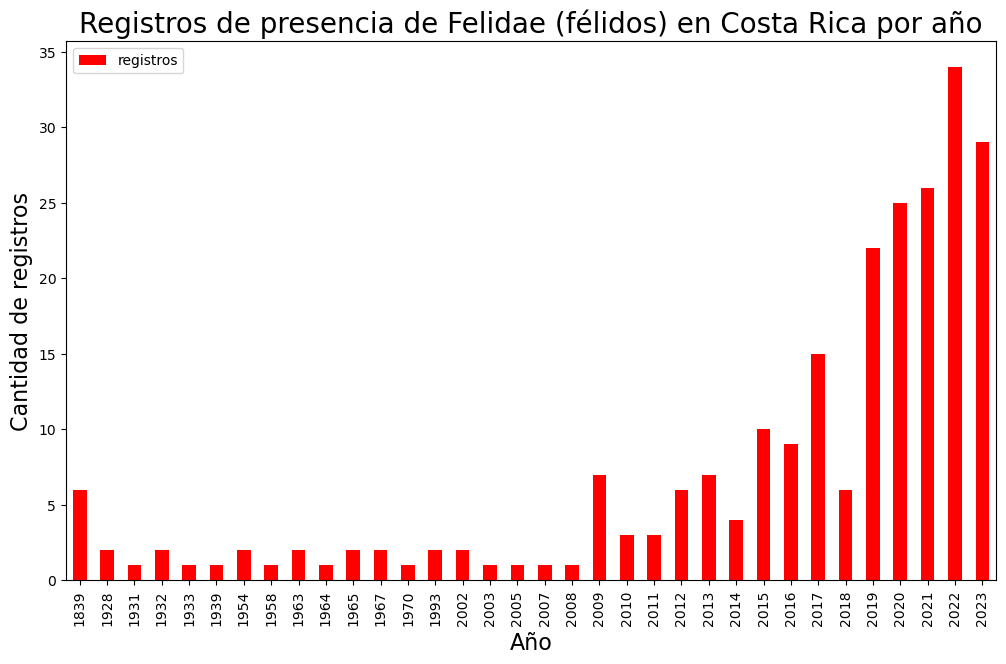

In [24]:
# Graficación
felidos_registros_x_anio_df.plot(x='anio', y='registros', kind='bar', figsize=(12,7), color='red')

# Título y leyendas en los ejes
plt.title('Registros de presencia de Felidae (félidos) en Costa Rica por año', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16)

##### Distribución de registros de presencia por mes

In [25]:
# Agrupación de los registros por mes
felidos_registros_x_mes = felidos.groupby(felidos['eventDate'].dt.month).count().eventDate

felidos_registros_x_mes

eventDate
1.0     36
2.0     23
3.0     32
4.0     19
5.0     17
6.0     20
7.0     23
8.0     15
9.0     12
10.0    12
11.0     8
12.0    21
Name: eventDate, dtype: int64

In [26]:
# Reemplazo del número del mes por el nombre del mes
felidos_registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]

felidos_registros_x_mes

January      36
February     23
March        32
April        19
May          17
June         20
July         23
August       15
September    12
October      12
November      8
December     21
Name: eventDate, dtype: int64

In [27]:
# Cambio de los nombres de los meses a español
nombres_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
felidos_registros_x_mes.index = nombres_meses

felidos_registros_x_mes

Enero         36
Febrero       23
Marzo         32
Abril         19
Mayo          17
Junio         20
Julio         23
Agosto        15
Septiembre    12
Octubre       12
Noviembre      8
Diciembre     21
Name: eventDate, dtype: int64

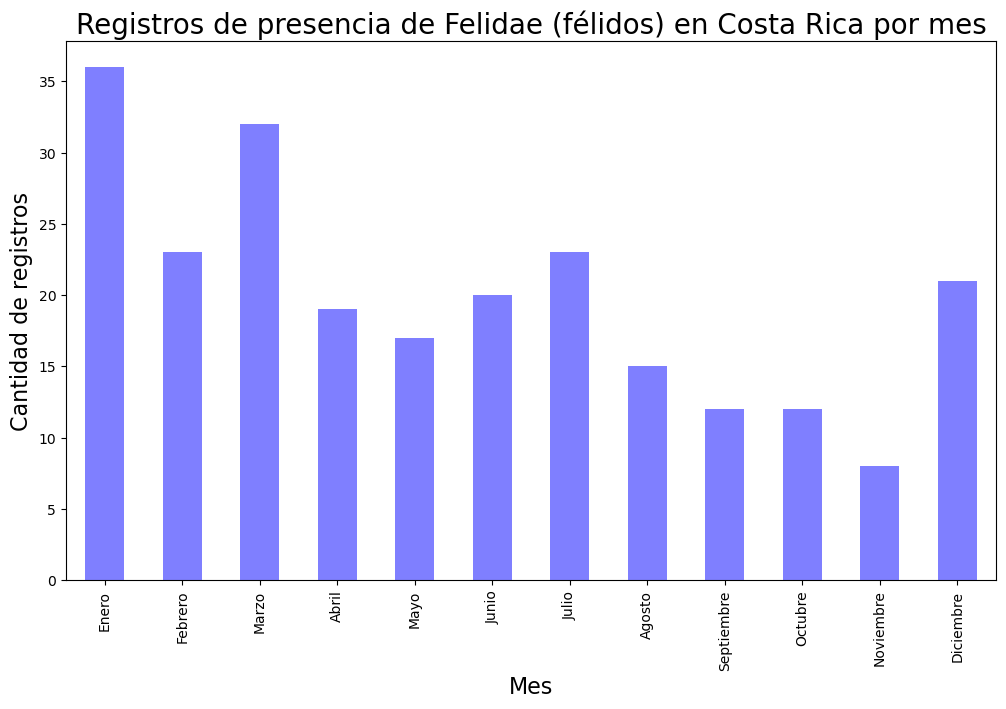

In [28]:
# Gráfico de barras
felidos_registros_x_mes.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros de presencia de Felidae (félidos) en Costa Rica por mes', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

##### Graficación en una línea de tiempo

In [29]:
# Agrupación de los registros por fecha
registros_x_fecha = felidos.groupby(felidos['eventDate'].dt.date).count().eventDate

registros_x_fecha

eventDate
1839-01-01    6
1928-01-01    2
1931-05-29    1
1932-01-01    1
1932-06-01    1
             ..
2023-07-05    1
2023-07-13    1
2023-07-22    1
2023-07-25    1
2023-08-13    1
Name: eventDate, Length: 216, dtype: int64

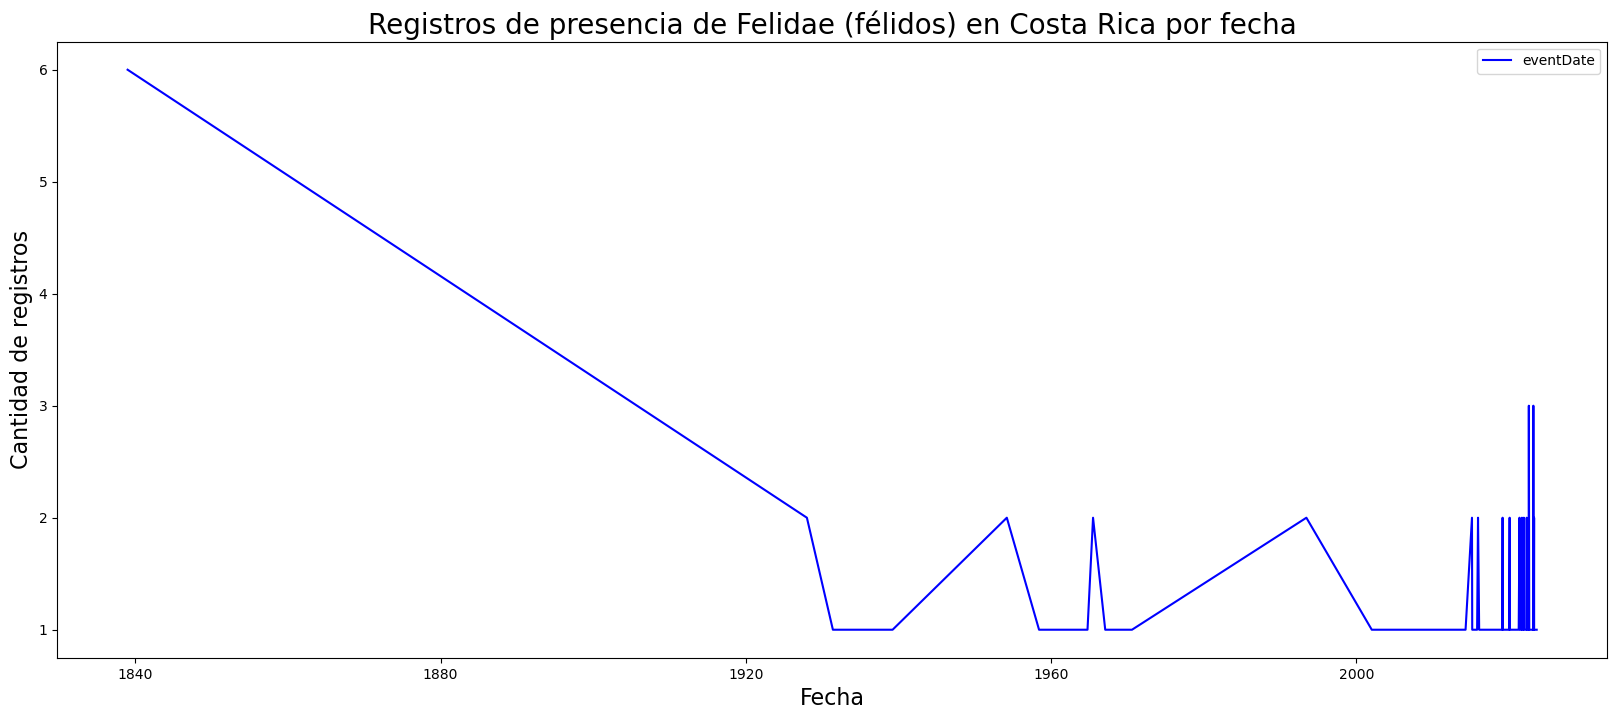

In [30]:
# Gráfico de líneas
registros_x_fecha.plot(figsize=(20,8), color='blue')

# Título y leyendas en los ejes
plt.title('Registros de presencia de Felidae (félidos) en Costa Rica por fecha', fontsize=20)
plt.xlabel('Fecha',fontsize=16)
plt.ylabel('Cantidad de registros',fontsize=16);
plt.legend()